In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics

In [2]:
# Read in the dataset of 
data = pd.read_csv('wine-quality.csv')

# Remove rows with NaN values
data = data.dropna()

In [3]:
# Data exploration
data.head(n=12)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [4]:
# Let's find the average rating for the quality of all the wines considered
average_quality = data['quality'].mean()

# Use the average quality value as a cutoff between bad/good wines to change to binary values for ease
data['quality'] = data['quality'].map(lambda x: 0 if x <= average_quality else 1)

In [6]:
# Set the features and data
# Given we are only using two features, we can easily visualize the algorithm
X = np.array(data[['volatile acidity','alcohol']].values)
y = np.array(data['quality'].values)

# Assign bad/good labels to the target variable
bad = data.loc[y==0]
good = data.loc[y == 1]

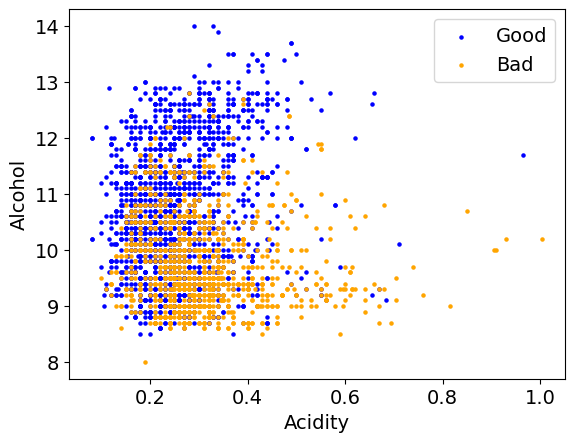

In [7]:
# Plot the data to visualise a boundary
index1 = 2
index2 = 11

plt.scatter(good.iloc[:, index1], good.iloc[:, index2], s=5, label='Good',color='blue')
plt.scatter(bad.iloc[:, index1], bad.iloc[:, index2], s=5, label='Bad',color='orange')
plt.legend(fontsize=14)
plt.xlabel('Acidity',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Alcohol', fontsize=14)
plt.show()

In [8]:
# Define sigmoid function to have x value outputs that are 0 < x < 1 
def sigmoid(z):
    return 1/(1 + np.exp(-z))

# Function to define the model
def model(X, y, alpha, epochs):
    
    # m -> number of examples
    # n -> number of features
    
    m = X.shape[0]
    n = X.shape[1]
    
    y = y.reshape(m,1)
    
    # Initialize weights and biases
    theta = np.zeros((n,1))
    b = 0
    
    # List of costs
    J = []

    for i in range(epochs):
        
        # Compute hypothesis
        h = sigmoid( np.dot(X, theta) + b)

        # Perform gradients to update weights and biases
        dt = (1/m) * np.dot(X.T, (h-y))
        db = (1/m)* np.sum((h - y)) 
        
        # Update the values
        theta = theta - alpha*dt
        b = b - alpha*db

        # Calculate cost and add it to the list
        cost = (-1/m) * np.sum(y*np.log(h) + (1-y) * np.log(1-h))
        J.append(cost)
        
    return theta, b, J

In [78]:
# Specify learning parameters
alpha = 0.01
epochs = 200000

# Run the model
theta, b, J = model(X, y, alpha, epochs)

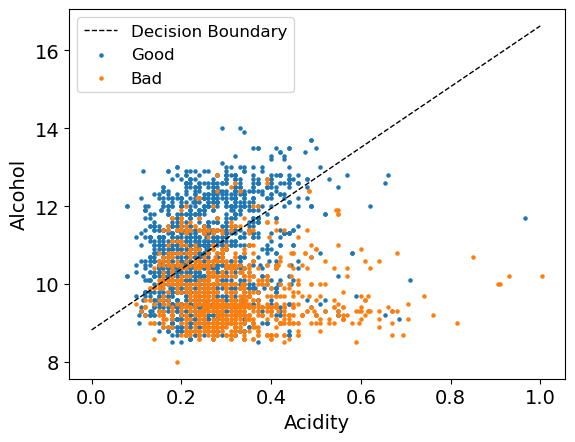

In [81]:
# Calculate the intercept and gradient of the decision boundary
c = -b/theta[1]
m = -theta[0]/theta[1]

# Generate the separation line
xmin, xmax = 0,1
ymin, ymax = 2, 12
xd = np.array([xmin, xmax])
yd = m*xd + c

# Plot the separation line with the data
plt.plot(xd, yd, 'k', lw=1, ls='--',label='Decision Boundary')
plt.scatter(good.iloc[:, index1], good.iloc[:, index2], s=5, label='Good')
plt.scatter(bad.iloc[:, index1], bad.iloc[:, index2], s=5, label='Bad')
plt.legend(fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Acidity',fontsize=14)
plt.ylabel('Alcohol',fontsize=14)
plt.show()

In [84]:
def acc(X,theta,b,y):
    
    # Calculating hypothesis
    h = sigmoid(np.dot(X, theta) + b)
    
    # Empty List to store predictions
    pred_class = []
    
    # if h >= 0.5 --> round up to 1
    # if h < 0.5 --> round to 0
    pred_class = [1 if i > 0.5 else 0 for i in h]
    
    accuracy = np.sum(y == pred_class) / len(y)
    
    return print('The accuracy of the fit is:', accuracy*100, '%')

acc(X,theta,b,y)

The accuracy of the fit is: 73.53333333333333 %
